In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import profile
import time

# Problem 2: Maximizing Profit with Limited Budget

**Algorithmic Strategy:** Dynamic Programming (0/1 Knapsack)  
**Application Domain:** Investment, Budget Planning  

**Problem Description:**  
We are given a set of projects, each with an investment cost and expected profit.  
Our goal is to select projects that maximize profit while staying within a given budget.


In [3]:
# Projects: (Project ID, Cost, Profit)
projects = [
    ('P1', 10, 15),
    ('P2', 20, 25),
    ('P3', 30, 40),
    ('P4', 25, 30),
    ('P5', 15, 18),
    ('P6', 12, 20)
]

# Separate lists for costs & profits (for DP)
costs = [p[1] for p in projects]
profits = [p[2] for p in projects]

# Total budget (capacity of knapsack)
budget = 50  # You can change as needed


In [4]:
def knapsack(costs, profits, budget):
    n = len(profits)
    # DP table: (n+1) x (budget+1)
    dp = [[0 for _ in range(budget+1)] for _ in range(n+1)]

    # Build DP table
    for i in range(1, n+1):
        for w in range(1, budget+1):
            if costs[i-1] <= w:
                dp[i][w] = max(profits[i-1] + dp[i-1][w-costs[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]

    # Backtrack to find selected projects
    w = budget
    selected_projects = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected_projects.append(projects[i-1][0])
            w -= costs[i-1]

    return dp[n][budget], selected_projects


In [5]:
max_profit, selected_projects = knapsack(costs, profits, budget)

print("Selected Projects:", selected_projects)
print("Maximum Profit Achieved:", max_profit, "Lakhs")

Selected Projects: ['P3', 'P2']
Maximum Profit Achieved: 65 Lakhs


**Time Complexity:**  
- Filling DP table = O(n * budget)  
- Backtracking = O(n)  
- Overall: O(n * budget)

**Space Complexity:**  
- DP table of size (n+1) × (budget+1) = O(n * budget)  
- Can be optimized to O(budget) if needed.

**Real-World Constraints:**  
- Budget is limited and cannot be exceeded.  
- Some projects may have dependencies (not modeled here).  
- Profit values may be uncertain in practice.

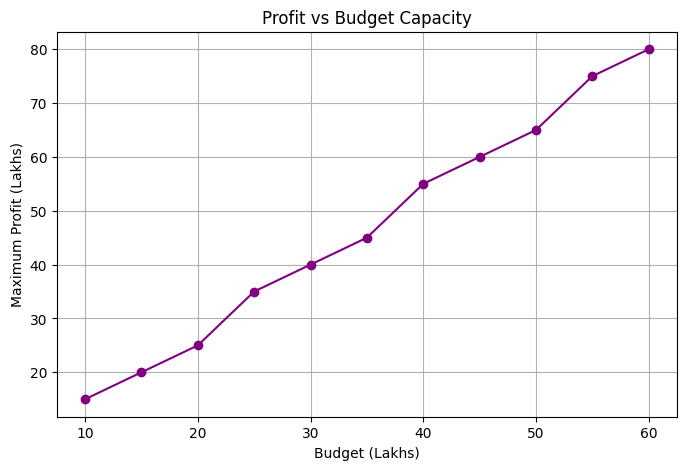

In [6]:
# Try different budgets and compute max profit
budgets = range(10, 61, 5)  # From 10 to 60 lakhs
profits_vs_budget = [knapsack(costs, profits, b)[0] for b in budgets]

plt.figure(figsize=(8,5))
plt.plot(budgets, profits_vs_budget, marker='o', linestyle='-', color='purple')
plt.title("Profit vs Budget Capacity")
plt.xlabel("Budget (Lakhs)")
plt.ylabel("Maximum Profit (Lakhs)")
plt.grid(True)
plt.show()
